![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [4]:
data = pd.read_csv(r'C:\Users\paula\OneDrive\Curso\Henry\M6\Proyecto_Integrador\Propuesta 1\BBDD_Hospitalización.csv',sep=";")
data.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3


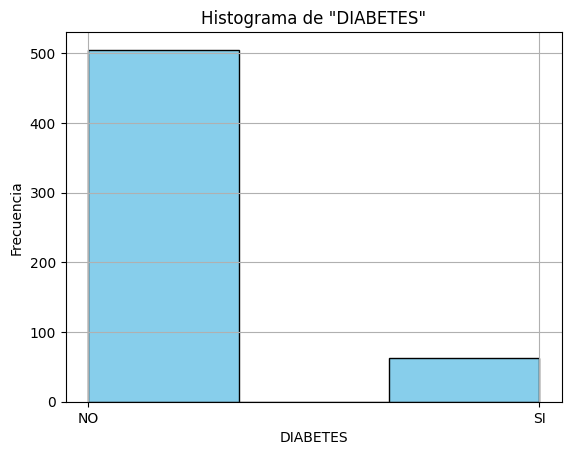

In [5]:
# Crear el histograma
data["DIABETES"].hist(bins=3,color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title(f'Histograma de "DIABETES"')
plt.xlabel("DIABETES")
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


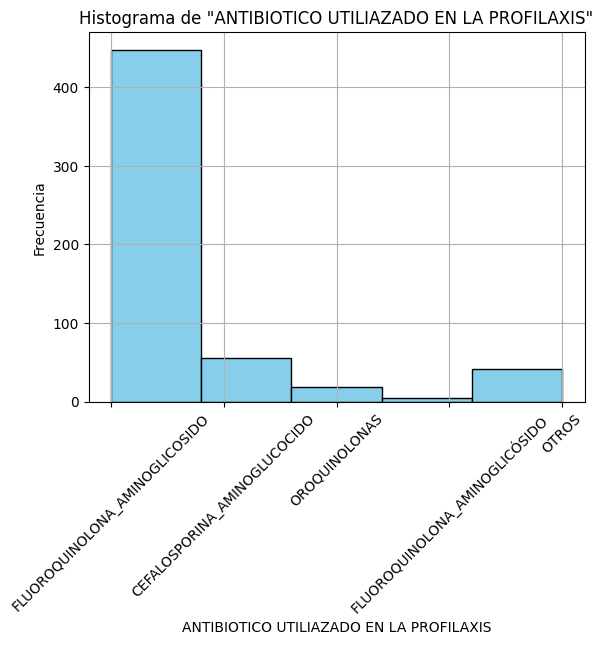

In [6]:
# Crear el histograma
data["ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS"].hist(bins=(len(data["ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS"].unique())),color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title(f'Histograma de "ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS"')
plt.xlabel("ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS")
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


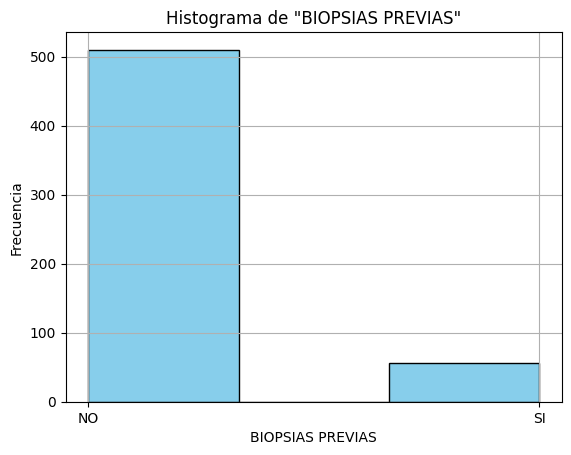

In [7]:
# Crear el histograma
data["BIOPSIAS PREVIAS"].hist(bins=3,color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title(f'Histograma de "BIOPSIAS PREVIAS"')
plt.xlabel("BIOPSIAS PREVIAS")
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

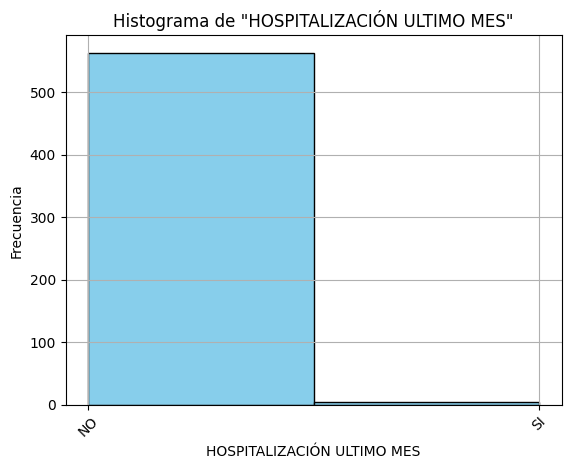

In [ ]:
# Crear el histograma
data["HOSPITALIZACIÓN ULTIMO MES"].hist(bins=(len(data["HOSPITALIZACIÓN ULTIMO MES"].unique())),color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title(f'Histograma de "HOSPITALIZACIÓN ULTIMO MES"')
plt.xlabel("HOSPITALIZACIÓN ULTIMO MES")
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

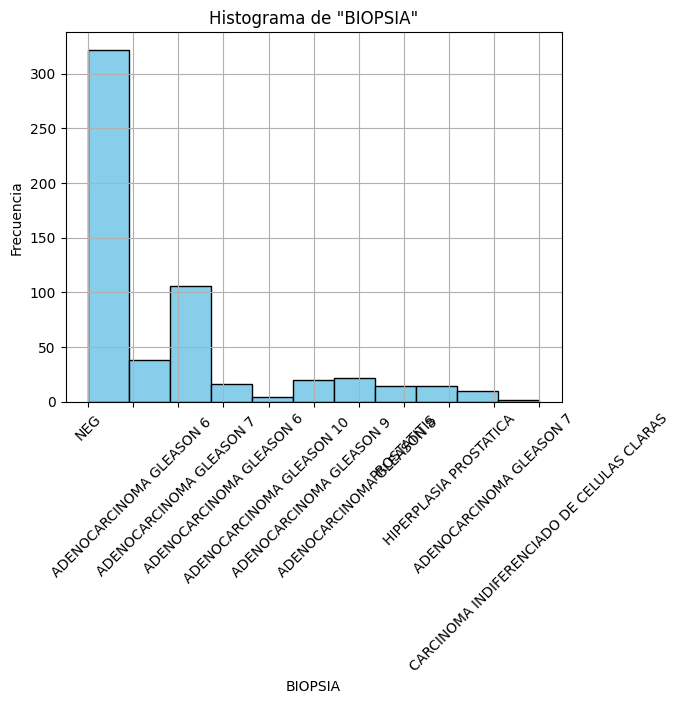

In [10]:
# Crear el histograma
data["BIOPSIA"].hist(bins=(len(data["BIOPSIA"].unique())),color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title(f'Histograma de "BIOPSIA"')
plt.xlabel("BIOPSIA")
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [5]:
data.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

Para el caso de las variables numéricas, ¿Es necesario normalizar?

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 